In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
actor_metrics = pd.read_csv('../data/balanced_df.csv')
data = pd.read_csv('../data/data.csv')

In [95]:
# star score function
def star_score(num_appear, avg_revenue, avg_rating):
    return (num_appear + 0.17 * np.log(avg_revenue))**(np.log10(avg_rating))

In [96]:
def minMaxScale(data, m = None): #min max scaling
    mini = min(data)
    maxi = max(data)
    
    if (m != None): mini = m
    
    return (data - mini)/(maxi - mini)

In [97]:
def avg_revs(revenues):
    k = 1
    avg_revs = []

    for i in range(len(revenues)):
        num_rev = revenues[:k]
        temp = np.mean(num_rev)
        avg_revs.append(temp)
        k += 1

    return avg_revs

In [98]:
def avg_ratings(ratings, num_votes):
    k = 1
    avg_ratings = []
    normalized_ratings = np.multiply(ratings, minMaxScale(np.log(num_votes), m = 0))
    
    for i in range(len(normalized_ratings)):
        num_ratings = normalized_ratings[:k]
        temp = np.mean(num_ratings)
        avg_ratings.append(temp)
        k += 1

    return avg_ratings

In [99]:
def rel_star_score(revenues, ratings, num_votes):
    avg_rev = avg_revs(revenues)
    avg_rating = avg_ratings(ratings, num_votes)

    # Computes star score for each appearance
    scores = []
    for i in range(len(revenues)):
        scores_temp = star_score(i+1, avg_rev[i], avg_rating[i])
        scores.append(scores_temp)
    
    # Compute relative store score
    rel_scores = []
    for j in range(len(scores) - 1):
        rel_temp = np.abs(scores[j] - scores[j+1])
        rel_scores.append(rel_temp)

    return rel_scores

In [132]:
def rel_score_plot(rel_scores, actor_name):
    plt.plot(np.arange(start=1, stop=len(rel_scores)+1), rel_scores)
    plt.locator_params(axis='x', integer=True, tight=True)
    plt.title(actor_name + 's Relative Star Score')
    #plt.xlabel('Change in Appearances')
    plt.ylabel('Relative Star Score per appearance')
    plt.show()

In [101]:
def rel_star_score_demo(actor_name):
    actor_data = data.loc[data['Actor_name'] == actor_name]

    if actor_data.shape[0] <= 3:
        print('This actor does not have enough appearances to compute a useful graph')
        return
    
    rel_scores = rel_star_score(actor_data['box_office_adj'], actor_data['averageRating'], actor_data['numVotes'])
    rel_score_plot(rel_scores, actor_name)

In [124]:
random_actor = actor_metrics.iloc[np.random.choice(len(actor_metrics['actor']))]['actor']
random_actor = random_actor.replace('_', ' ')
random_actor

'Sybil Danning'

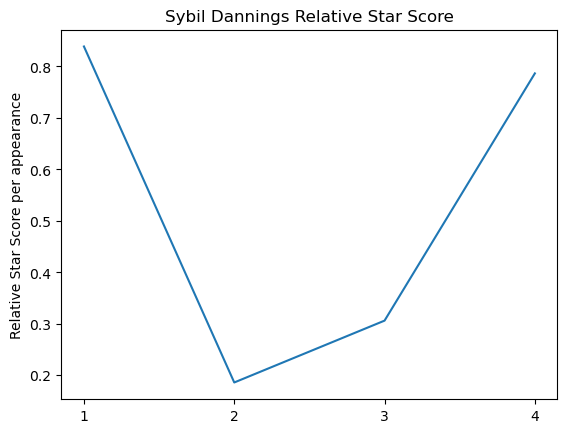

In [133]:
rel_star_score_demo(random_actor)